In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


     |████████████████████████████████| 40.6MB 107kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

Celem zadania jest obliczenie minimalnej mocy na rezystorach na poniżej przedstawionym mostku.

Na poniższym obrazku mamy przedstawiony schemat układu oraz dane dotyczące prądów i spadków napięcia na poszczególnych rezystorach.

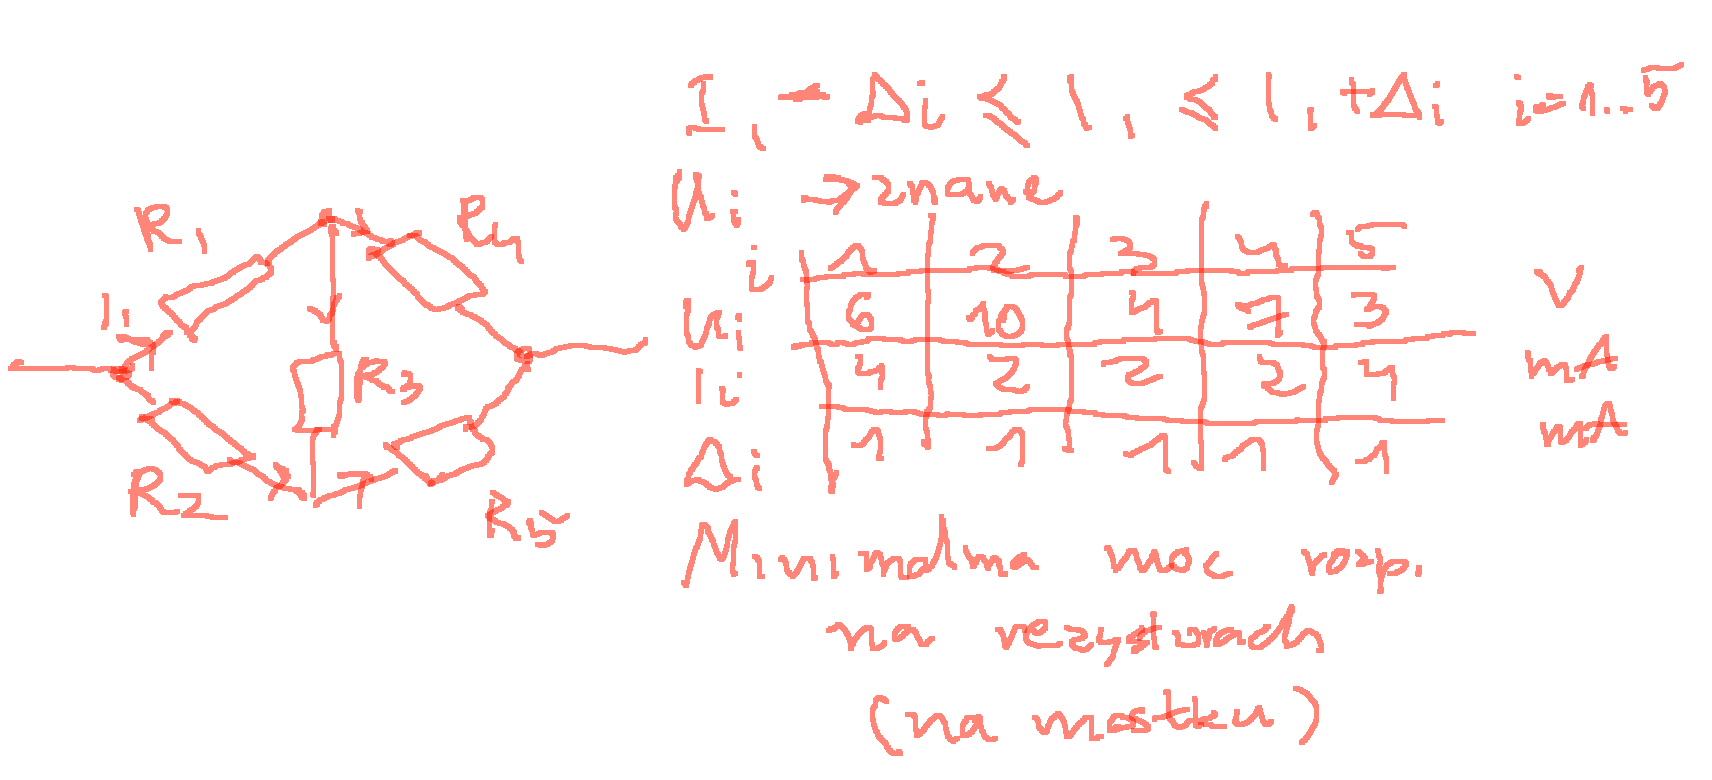


In [ ]:
from pulp import *
#print(pulp.__version__)

U = [6,10,4,7,3]

# Stworzenie problemu optymalizacji liniowej
prob = LpProblem("Minimalizacja_mocy_na_rezystorach",LpMinimize)

I1=LpVariable("I1",0,None,LpContinuous)
I2=LpVariable("I2",0,None,LpContinuous)
I3=LpVariable("I3",0,None,LpContinuous)
I4=LpVariable("I4",0,None,LpContinuous)
I5=LpVariable("I5",0,None,LpContinuous)

#Obliczanie mocy
prob += (I1*6) + (I2*10) + (I3*4) + (I4*7) + (I5*3)

#z praw Kirchhoffa

prob += I1 == I3+I4
prob += I2 == I5-I3
prob += I1+I2 == I4+I5


#ograniczenia

prob += I1 >= 3
prob += I2 >= 1
prob += I3 >= 1
prob += I4 >= 1
prob += I5 >= 3

prob += I1 <= 5
prob += I2 <= 3
prob += I3 <= 3
prob += I4 <= 3
prob += I5 <= 5

prob.writeLP("rezo.lp")
prob.solve()

varsdict = {}

k = 0
for l in prob.variables():
    varsdict[l.name,"R"+str(k+1)] = str(l.varValue), U[k]/l.varValue
    k += 1

#!cat "rezo.lp"

# Wyświetlani danych na ekranie
print("Minimalna moc to {}W, \nPrąd na rezystorze [A] , Rezystancja [Ω]: {}".format(value(prob.objective),varsdict))

Minimalna moc to 52.0W, 
Prąd na rezystorze [A] , Rezystancja [Ω]: {('I1', 'R1'): ('3.0', 2.0), ('I2', 'R2'): ('1.0', 10.0), ('I3', 'R3'): ('2.0', 2.0), ('I4', 'R4'): ('1.0', 7.0), ('I5', 'R5'): ('3.0', 1.0)}
